In [14]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mat

In [15]:
myDF = sb.load_dataset("titanic")
myDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
myDF.drop(["sibsp","parch","embarked","class","who","adult_male","deck","embark_town","alone","alive"],axis=1,inplace=True)
myDF

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
myDF.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

In [17]:
myDF["age"].isnull().sum()

np.int64(177)

In [20]:
myDF["age"].fillna(value=myDF["age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

,survived,pclass,sex,age,fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [24]:
myDF["sex"].replace({"male":"1","female":"2"},inplace=True)
myDF

,survived,pclass,sex,age,fare
0,0,3,1,22.000000,7.2500
1,1,1,2,38.000000,71.2833
2,1,3,2,26.000000,7.9250
3,1,1,2,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,2,19.000000,30.0000
888,0,3,2,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(myDF[["pclass","sex","age","fare"]],myDF.survived)

In [30]:
X_train

,pclass,sex,age,fare
830,3,2,15.000000,14.4542
242,2,1,29.000000,10.5000
82,3,2,29.699118,7.7875
99,2,1,34.000000,26.0000
762,3,1,20.000000,7.2292
...,...,...,...,...
189,3,1,36.000000,7.8958
772,2,2,57.000000,10.5000
615,2,2,24.000000,65.0000
372,3,1,19.000000,8.0500


In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB()

In [34]:
model.fit(X_train,y_train)

GaussianNB()

In [35]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [38]:
model.score(X_test,y_test)

0.7892376681614349

<Axes: xlabel='age', ylabel='survived'>

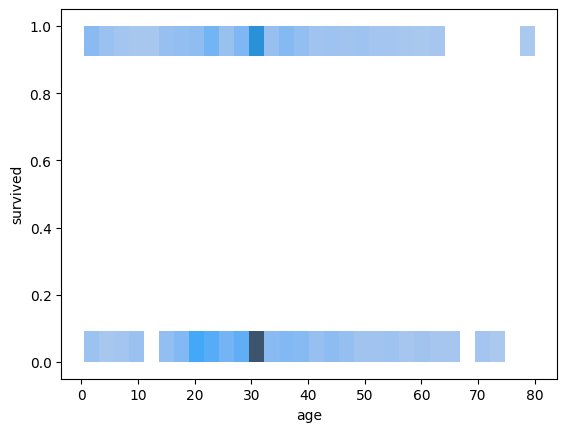

In [39]:
sb.histplot(data=myDF,x="age",y="survived",kde=True)